<a href="https://colab.research.google.com/github/agustinLapi/MachineLearning/blob/main/Dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
wine_revs_1 = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectWNF/data/winemag-data_first150k.csv")
#wine_revs_1.head()

In [3]:
wine_revs_2 = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectWNF/data/winemag-data-second130k.csv")
#wine_revs_2.head()

In [4]:
wine_revs =pd.concat([wine_revs_1, wine_revs_2], ignore_index=True)
wine_revs.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,taster_name,taster_twitter_handle,title
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,NaN,NaN,NaN
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,NaN,NaN,NaN
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,NaN,NaN,NaN
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,NaN,NaN,NaN
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,NaN,NaN,NaN


In [6]:
le = LabelEncoder()
cat_features=[x for x in wine_revs.columns if wine_revs[x].dtype=="object"]
# Now apply the transformation to all the columns:
for col in cat_features:
    if col in wine_revs.columns:
        i = wine_revs.columns.get_loc(col)
        wine_revs.iloc[:,i] = wine_revs.apply(lambda i:le.fit_transform(i.astype(str)), axis=0, result_type='expand')

In [7]:
wine_revs.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,taster_name,taster_twitter_handle,title
0,0,46,151442,26802,96,235.0,53,801,7,84,9617,19,15,118718
1,1,42,94489,6946,96,110.0,296,1156,18,655,1596,19,15,118718
2,2,46,74904,39270,96,90.0,53,576,13,553,11865,19,15,118718
3,3,46,150448,34555,96,65.0,305,1318,17,476,14377,19,15,118718
4,4,16,143863,22108,95,66.0,340,71,18,499,7198,19,15,118718


In [10]:
columns = ['country', 'description', 'designation', 'points','province', 'region_1', 'region_2', 'variety', 'winery', 'taster_name', 'taster_twitter_handle', 'title']
X_features = wine_revs[columns]
y_label = wine_revs.iloc[:, 5]

In [11]:
scaler = StandardScaler()
X_features = scaler.fit_transform(X_features)

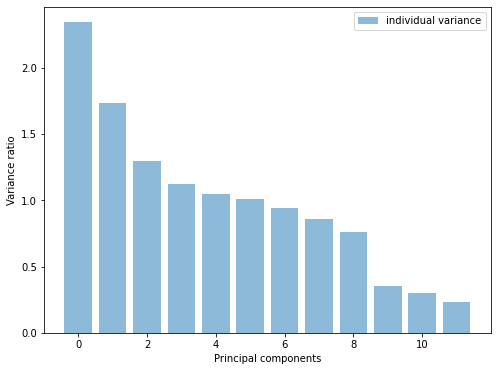

In [13]:
# Visualize
pca = PCA()
pca.fit_transform(X_features)
pca_variance = pca.explained_variance_

plt.figure(figsize=(8, 6))
plt.bar(range(12), pca_variance, alpha=0.5, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

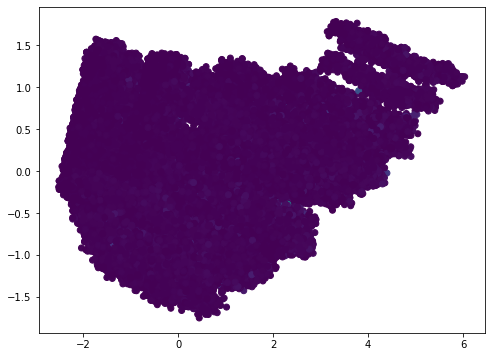

In [27]:
pca2 = PCA(n_components=10)
pca2.fit(X_features)
x_3d = pca2.transform(X_features)

plt.figure(figsize=(8,6))
plt.scatter(x_3d[:,0], x_3d[:,9], c=wine_revs['price'])
plt.show()

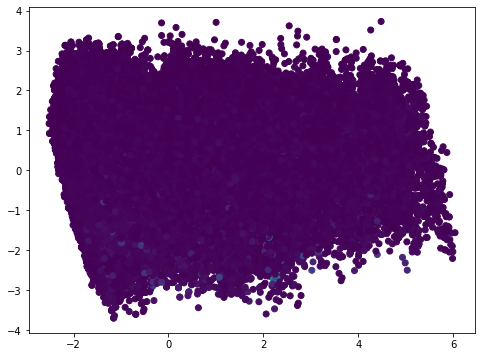

In [28]:
pca2 = PCA(n_components=8)
pca2.fit(X_features)
x_3d = pca2.transform(X_features)

plt.figure(figsize=(8,6))
plt.scatter(x_3d[:,0], x_3d[:,7], c=wine_revs['price'])
plt.show()

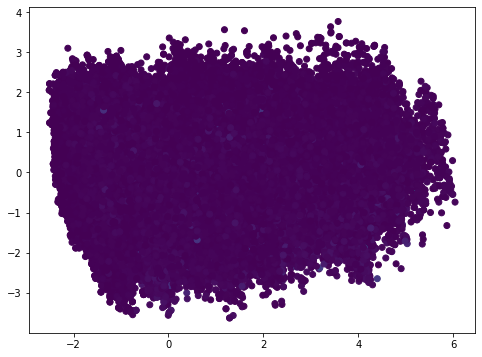

In [21]:
pca2 = PCA(n_components=6)
pca2.fit(X_features)
x_3d = pca2.transform(X_features)

plt.figure(figsize=(8,6))
plt.scatter(x_3d[:,0], x_3d[:,5], c=wine_revs['price'])
plt.show()

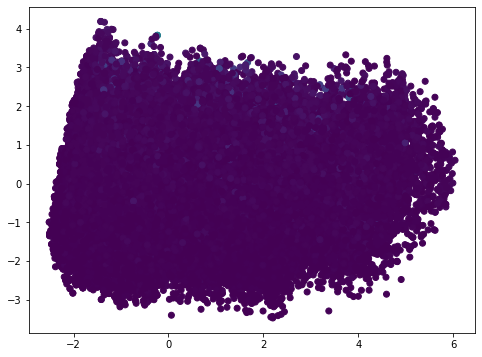

In [24]:
pca2 = PCA(n_components=4)
pca2.fit(X_features)
x_3d = pca2.transform(X_features)

plt.figure(figsize=(8,6))
plt.scatter(x_3d[:,0], x_3d[:,3], c=wine_revs['price'])
plt.show()

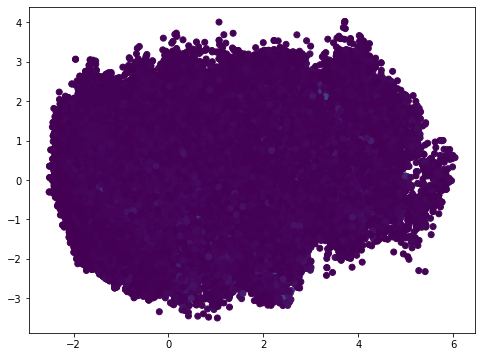

In [25]:
pca2 = PCA(n_components=3)
pca2.fit(X_features)
x_3d = pca2.transform(X_features)

plt.figure(figsize=(8,6))
plt.scatter(x_3d[:,0], x_3d[:,2], c=wine_revs['price'])
plt.show()

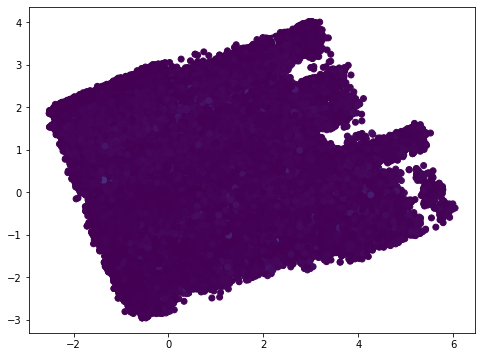

In [26]:
pca3 = PCA(n_components=2)
pca3.fit(X_features)
x_3d = pca3.transform(X_features)

plt.figure(figsize=(8,6))
plt.scatter(x_3d[:,0], x_3d[:,1], c=wine_revs['price'])
plt.show()

###Del analisis se observa que son 9 los features que más aportan. En principio podemos decir que tomar una reducción de 3 features en la dimensión del dataset no supone un cambio significativo en los resultados. Esto en parte puede deberse a que hay tres columnas que tienen muchos valores "NaN"
###Así que lo que hare a continuación es eliminar esas tres columnas del análisis, hacer un drop na y realizar el análisis de nuevo.

In [31]:
wine_revs.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,taster_name,taster_twitter_handle,title
0,0,46,151442,26802,96,235.0,53,801,7,84,9617,19,15,118718
1,1,42,94489,6946,96,110.0,296,1156,18,655,1596,19,15,118718
2,2,46,74904,39270,96,90.0,53,576,13,553,11865,19,15,118718
3,3,46,150448,34555,96,65.0,305,1318,17,476,14377,19,15,118718
4,4,16,143863,22108,95,66.0,340,71,18,499,7198,19,15,118718


In [32]:
wine_revs.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery',
       'taster_name', 'taster_twitter_handle', 'title'],
      dtype='object')

In [35]:
wine_revs =pd.concat([wine_revs_1, wine_revs_2], ignore_index=True)
columns = ['country', 'description', 'designation', 'points', 'price', 'province', 'region_1', 'region_2', 'variety', 'winery'] 
wine_revs = wine_revs[columns]
revs = wine_revs[wine_revs.duplicated('description', keep=False)]
revs =revs.dropna()
revs.reset_index(inplace=True)
revs.head()

,index,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,27,US,"Focused and dense, this intense wine captures ...",Abetina,94,105.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
1,28,US,"Cranberry, baked rhubarb, anise and crushed sl...",Garys' Vineyard,94,60.0,California,Santa Lucia Highlands,Central Coast,Pinot Noir,Roar
2,29,US,This standout Rocks District wine brings earth...,The Funk Estate,94,60.0,Washington,Walla Walla Valley (WA),Columbia Valley,Syrah,Saviah
3,31,US,"Steely and perfumed, this wine sees only 20% n...",Babushka,90,37.0,California,Russian River Valley,Sonoma,Chardonnay,Zepaltas
4,34,US,"The aromas entice with notes of wet stone, hon...",Conner Lee Vineyard,90,42.0,Washington,Columbia Valley (WA),Columbia Valley,Chardonnay,Buty


In [36]:
le = LabelEncoder()
cat_features=[x for x in revs.columns if revs[x].dtype=="object"]
# Now apply the transformation to all the columns:
for col in cat_features:
    if col in revs.columns:
        i = revs.columns.get_loc(col)
        revs.iloc[:,i] = revs.apply(lambda i:le.fit_transform(i.astype(str)), axis=0, result_type='expand')
revs.head()

,index,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,27,0,5937,125,94,105.0,2,196,17,106,2219
1,28,0,4601,3326,94,60.0,0,154,1,106,2356
2,29,0,18213,8332,94,60.0,3,194,3,139,2488
3,31,0,12273,542,90,37.0,0,136,13,35,3208
4,34,0,13298,1785,90,42.0,3,36,3,35,435


In [37]:
revs.columns

Index(['index', 'country', 'description', 'designation', 'points', 'price',
       'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [40]:
columns = ['country', 'description', 'designation', 'points', 'province', 'region_1', 'region_2', 'variety', 'winery']
X_features = revs[columns]
y_label = revs['price']

In [41]:
scaler = StandardScaler()
X_features = scaler.fit_transform(X_features)

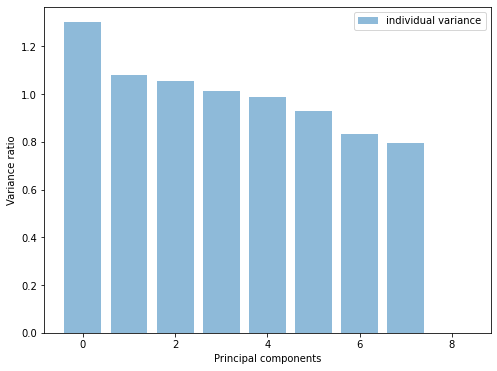

In [45]:
# Visualize
pca = PCA()
pca.fit_transform(X_features)
pca_variance = pca.explained_variance_

plt.figure(figsize=(8, 6))
plt.bar(range(9), pca_variance, alpha=0.5, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

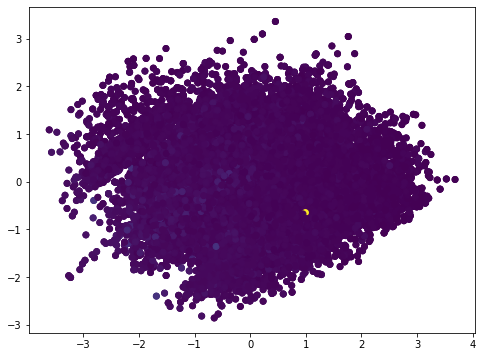

In [47]:
pca2 = PCA(n_components=8)
pca2.fit(X_features)
x_3d = pca2.transform(X_features)

plt.figure(figsize=(8,6))
plt.scatter(x_3d[:,0], x_3d[:,7], c=revs['price'])
plt.show()

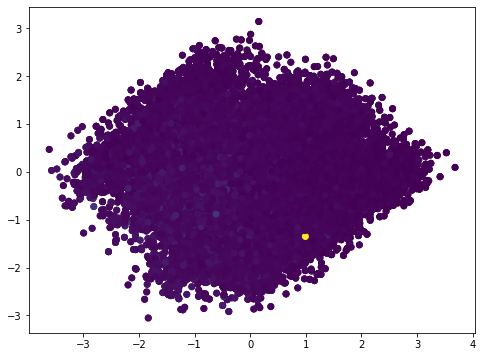

In [48]:
pca2 = PCA(n_components=7)
pca2.fit(X_features)
x_3d = pca2.transform(X_features)

plt.figure(figsize=(8,6))
plt.scatter(x_3d[:,0], x_3d[:,6], c=revs['price'])
plt.show()

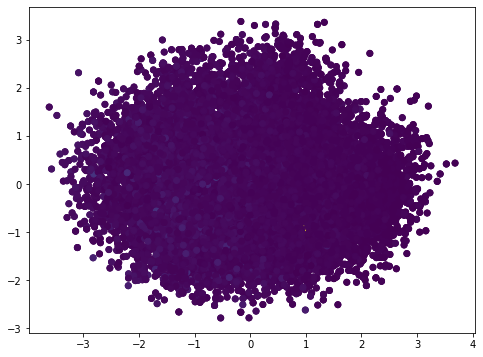

In [49]:
pca2 = PCA(n_components=6)
pca2.fit(X_features)
x_3d = pca2.transform(X_features)

plt.figure(figsize=(8,6))
plt.scatter(x_3d[:,0], x_3d[:,5], c=revs['price'])
plt.show()

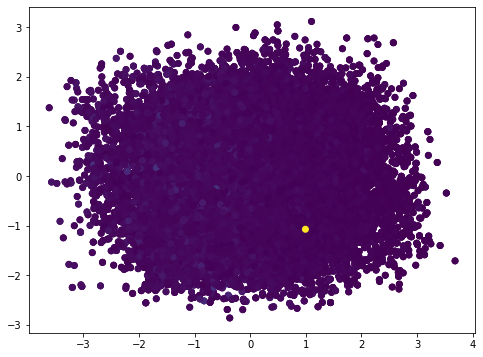

In [50]:
pca2 = PCA(n_components=5)
pca2.fit(X_features)
x_3d = pca2.transform(X_features)

plt.figure(figsize=(8,6))
plt.scatter(x_3d[:,0], x_3d[:,4], c=revs['price'])
plt.show()

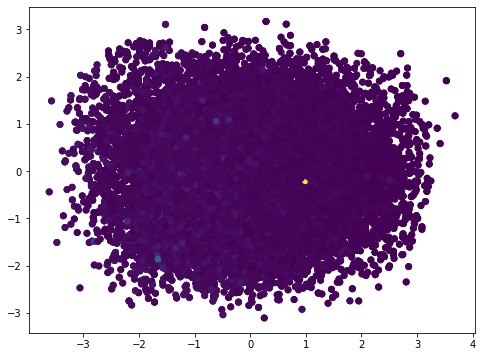

In [51]:
pca2 = PCA(n_components=4)
pca2.fit(X_features)
x_3d = pca2.transform(X_features)

plt.figure(figsize=(8,6))
plt.scatter(x_3d[:,0], x_3d[:,3], c=revs['price'])
plt.show()

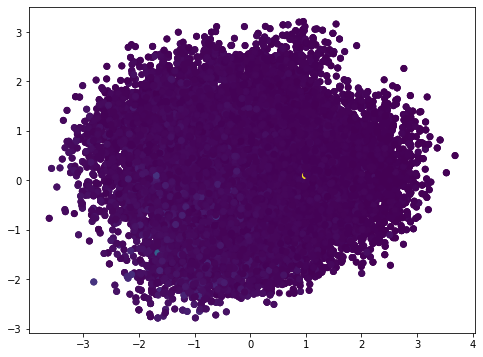

In [52]:
pca2 = PCA(n_components=3)
pca2.fit(X_features)
x_3d = pca2.transform(X_features)

plt.figure(figsize=(8,6))
plt.scatter(x_3d[:,0], x_3d[:,2], c=revs['price'])
plt.show()

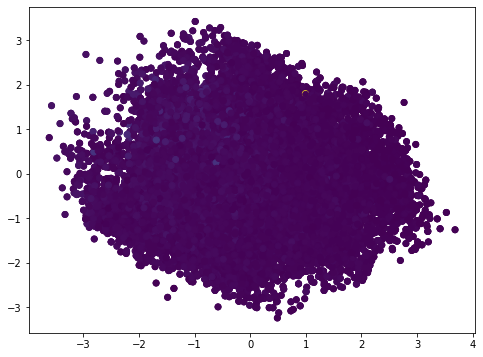

In [53]:
pca2 = PCA(n_components=2)
pca2.fit(X_features)
x_3d = pca2.transform(X_features)

plt.figure(figsize=(8,6))
plt.scatter(x_3d[:,0], x_3d[:,1], c=revs['price'])
plt.show()

###De lo que se observa anteriormente, es posible reducir la dimensionalidad del dataset a 8. Éstas 8 features aportan todas una cantidad similar de variación a los datos, y por lo tanto reducir por debajo de 8 features sería comenzar a perder datos valiosos.